In [40]:
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from os import listdir
import glob
import scipy.io
import cv2


In [3]:

files_xml = [f for f in glob.glob("Project2/*.xml")] # comes in random order

# os.path.basename(f) for just filename

In [4]:
weapon_coords = []
labels = []
for file in files_xml:
    root = ET.parse(file).getroot()
    

    for objct in root.findall('object'):
        #print(objct.find('name').text)
        labels.append(objct.find('name').text)

        box = []
        for coord in objct.find('bndbox'):
            box.append(int(coord.text))
            #print(int(coord.text))
        #print(np.array(box).reshape(2,2))
        weapon_coords.append(np.array(box).reshape(2,2))


print(len(files_xml), np.array(weapon_coords).shape, len(labels))
print(files_xml[0], np.array(weapon_coords)[0], labels[0])

538 (638, 2, 2) 638
Project2/1 (136).xml [[176 107]
 [252 174]] handgun


[[138  50]
 [265 418]]


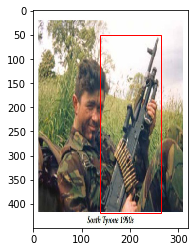

In [5]:
import matplotlib.patches as patches

nr = 1# which file 

imgFilename = files_xml[nr][:-3] + "jpg" # image filename for a given xml file
img = plt.imread(imgFilename)    

plt.imshow(img)
ax = plt.gca()
print(weapon_coords[nr])
xmin,ymin = weapon_coords[nr][0]
xmax,ymax = weapon_coords[nr][1]

rect = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

In [6]:
files_xml = [f for f in glob.glob("Project2/*.xml")] # comes in random order

labels = []
errorFiles = []

for file in files_xml:
    root = ET.parse(file).getroot()

    imgFilename = file[:-3] + "jpg" # image filename for a given xml file
    if os.path.exists(imgFilename):
        
        guns = []
        for objct in root.findall('object'):
            guns.append(objct.find('name').text)
        
        labels.append(np.array(guns))
        
    else:
        errorFiles.append(file)

        
for x in errorFiles:
    print("Removes file %s" % x)
    files_xml.remove(x)
        
    
print(len(files_xml), len(labels), labels[5])




Removes file Project2/2 (50).xml
Removes file Project2/2 (169).xml
Removes file Project2/2 (186).xml
535 535 ['handgun']


In [175]:
def extract_BBoxes(filename):
   
    root = ET.parse(filename).getroot()
    
    boxes = list()
    names = list()
    for objct in root.findall(".//object"):
        name = objct.find('name').text
        xmin = int(objct.find('bndbox/xmin').text)
        ymin = int(objct.find('bndbox/ymin').text)
        xmax = int(objct.find('bndbox/xmax').text)
        ymax = int(objct.find('bndbox/ymax').text)
        names.append(name)
        boxes.append([xmin,ymin,xmax,ymax])

    return [boxes,names]
    
def load_dataset(path, deleteFiles = False):
    files_xml = [f for f in glob.glob(str(path) + "/*.xml")] # comes in random order
    
    imgbbox = dict()
    print(len(files_xml))
    for file in files_xml:  
        
        imgFilePath = file[:-3] + "jpg"
        if os.path.exists(imgFilePath):  
            lbl_bbox = extract_BBoxes(file)  # Gets the bbox information
            
            #print(lbl_bbox[0])
            
            imgbbox.update({imgFilePath.replace(str(path)+"/",''): lbl_bbox})
            
        elif deleteFiles:
            print("Found xml with no jpg")
            print("Deleting xml file: %s" %file)
            os.remove(file)
            print("Deleted")

    return imgbbox

In [177]:
imgbbox = load_dataset('Project2', deleteFiles=False)
imgbbox

535


{'1 (136).jpg': [[[176, 107, 252, 174]], ['handgun']],
 '2 (163).jpg': [[[138, 50, 265, 418]], ['rifle']],
 '1 (15).jpg': [[[158, 103, 212, 155]], ['handgun']],
 '1 (161).jpg': [[[55, 48, 246, 305]], ['handgun']],
 '2 (134).jpg': [[[83, 48, 320, 448]], ['rifle']],
 '1 (42).jpg': [[[87, 148, 278, 284]], ['handgun']],
 '2 (358).jpg': [[[104, 2, 209, 450]], ['rifle']],
 '2 (122).jpg': [[[9, 80, 314, 418]], ['rifle']],
 '1 (177).jpg': [[[253, 175, 292, 226]], ['handgun']],
 '1 (54).jpg': [[[16, 26, 320, 342]], ['handgun']],
 '1 (198).jpg': [[[118, 116, 186, 177]], ['handgun']],
 '2 (175).jpg': [[[29, 141, 286, 275]], ['rifle']],
 '1 (120).jpg': [[[47, 39, 280, 406]], ['handgun']],
 '2 (319).jpg': [[[40, 1, 281, 429]], ['rifle']],
 '1 (78).jpg': [[[23, 19, 181, 313]], ['handgun']],
 '1 (97).jpg': [[[3, 26, 311, 353]], ['handgun']],
 '2 (71).jpg': [[[10, 56, 303, 199], [12, 234, 299, 380]], ['rifle', 'rifle']],
 '2 (227).jpg': [[[25, 63, 304, 307]], ['rifle']],
 '2 (362).jpg': [[[8, 15, 313,